<center><h1>Coronavirus - Data Analysis and predictions
</h1></center>
<img src='banner-coronavirus.png'>

In [139]:
# Importing certain libraries
import os
import math
import time
import random
import datetime
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Defining nature of matplotlib visualization
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

%matplotlib inline

In [140]:
# Importing datasets.
confirmed_data = pd.read_csv(os.path.join('novel-corona-virus-2019-dataset', 'time_series_covid_19_confirmed.csv'))
deaths_data = pd.read_csv(os.path.join('novel-corona-virus-2019-dataset', 'time_series_covid_19_deaths.csv'))
recoveries_data = pd.read_csv(os.path.join('novel-corona-virus-2019-dataset', 'time_series_covid_19_recovered.csv'))

### Getting header data from each file.

In [141]:
print("Confirmed Cases: ")
confirmed_data.head()

Confirmed Cases: 


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,NaN
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,414,414,418,418,422,426,428,428,429,NaN
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,NaN
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,102,119,120,124,124,125,0.0


In [142]:
print("Death Cases: ")
deaths_data.head()

Death Cases: 


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.0


In [143]:
print("Recovered Cases: ")
recoveries_data.head()

Recovered Cases: 


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,917,936,956,970,979,979,984,984,984,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,282,288,297,297,299,303,308,315,320,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,469,490,502,512,513,526,527,542,547,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,255,260,270,277,284,295,295,295,295,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,85,86,87,87,87,87,87,88,88,0.0


In [144]:
# Getting columns
columns = confirmed_data.keys()

In [145]:
# Extracting dates of outbreak of data.
confirmed_counts = confirmed_data.iloc[:, 4:]
deaths_counts = deaths_data.iloc[:, 4:]
recoveries_counts = recoveries_data.iloc[:, 4:]

In [146]:
# Extracting necessary data
dates = confirmed_counts.keys()
world_cases = []      
total_deaths = [] 
mortality_rate = []    #Defined as #deaths/#confirmed
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_data[i].sum()
    death_sum = deaths_data[i].sum()
    recovered_sum = recoveries_data[i].sum()

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

days_since_outbreak = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Removing trash variables:

In [147]:
# Future forcasting
days_in_future = 5
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-5]

In [148]:
# Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [149]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_outbreak, world_cases, test_size=0.2, shuffle=False) 

### Using SVM for Predicting number of confirmed cases.

In [150]:
# Setting up hyper-parameters
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

In [151]:
# Defining model and training
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=128, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 369 out of 384 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    5.5s finished
/home/aman/.conda/envs/tf_gpu/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=128, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['linear', 'poly', 'sigmoid',
                                                   'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [152]:
# Getting best parameters
svm_search.best_params_

{'shrinking': True, 'kernel': 'linear', 'gamma': 0.1, 'epsilon': 1, 'C': 10}

In [153]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 4132.124999999997
MSE: 36296446.3479166


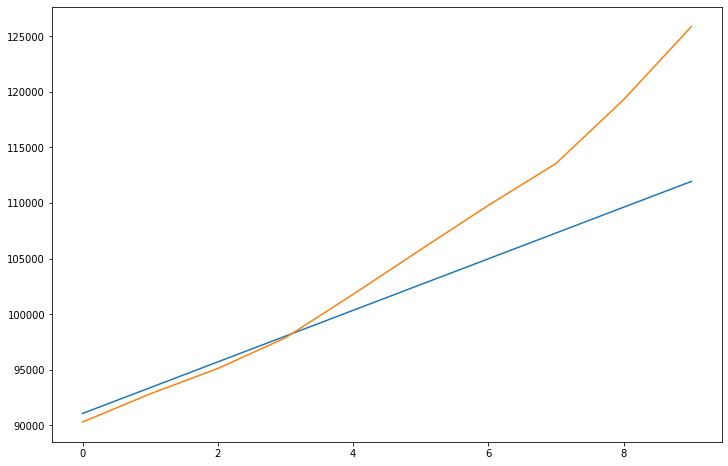

In [154]:
# Checking against test data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.figure(figsize=(12, 8))
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

### Using Linear Regression for Predicting number of confirmed cases.

In [155]:
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 7159.084193245789
MSE: 60638360.057895444


In [156]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[2682.68189493]]
[-7343.22195122]


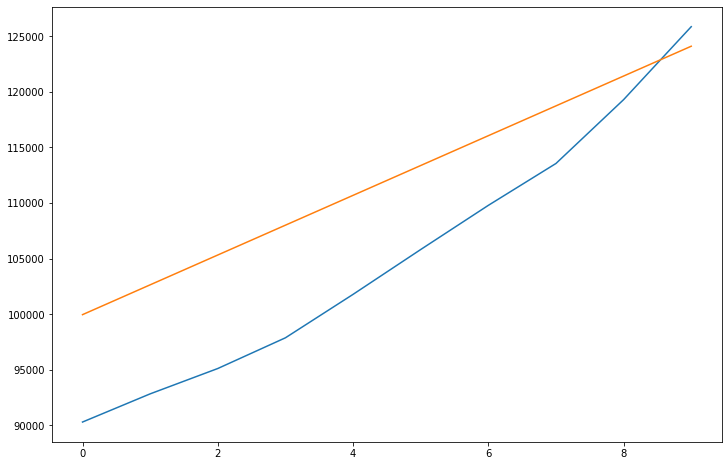

In [157]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

### Using Bayesian Ridge for Predicting number of confirmed cases.

In [158]:
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge()
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=128, verbose=1)
bayesian_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    0.3s finished
/home/aman/.conda/envs/tf_gpu/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=True,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=128, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                

In [159]:
bayesian_search.best_params_

{'tol': 0.001,
 'lambda_2': 1e-06,
 'lambda_1': 1e-07,
 'alpha_2': 1e-07,
 'alpha_1': 0.0001}

In [160]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 7106.842736656062
MSE: 59765317.976144806


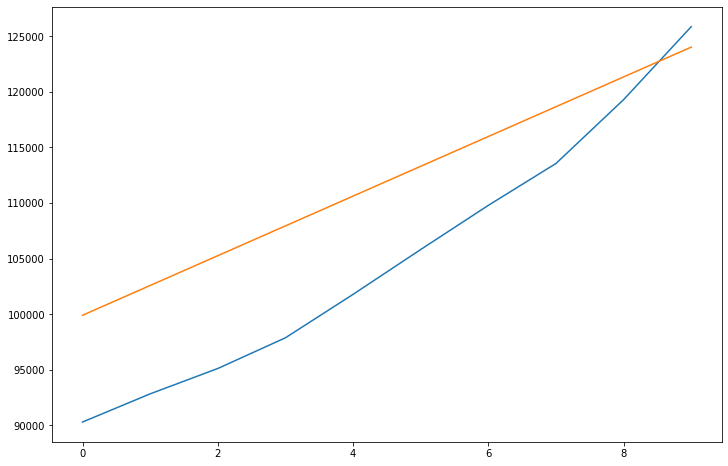

In [161]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)

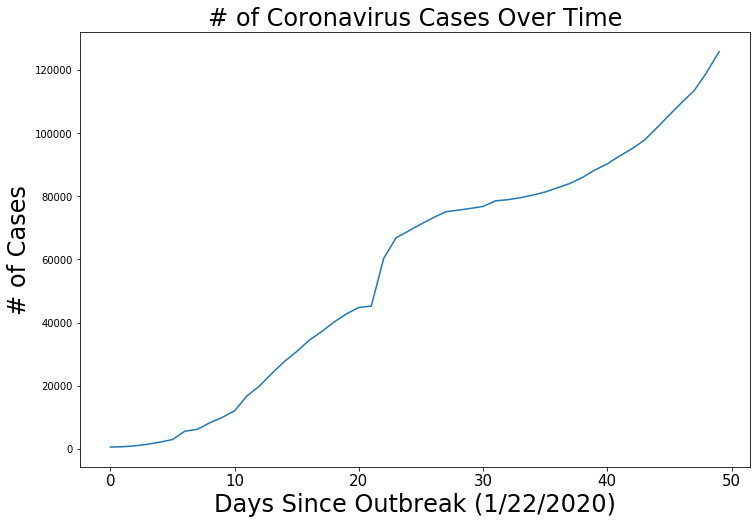

In [162]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=24)
plt.xlabel('Days Since Outbreak (1/22/2020)', size=24)
plt.ylabel('# of Cases', size=24)
plt.xticks(size=15)
plt.show()

## Predictions and Graph for Confirmed Cases

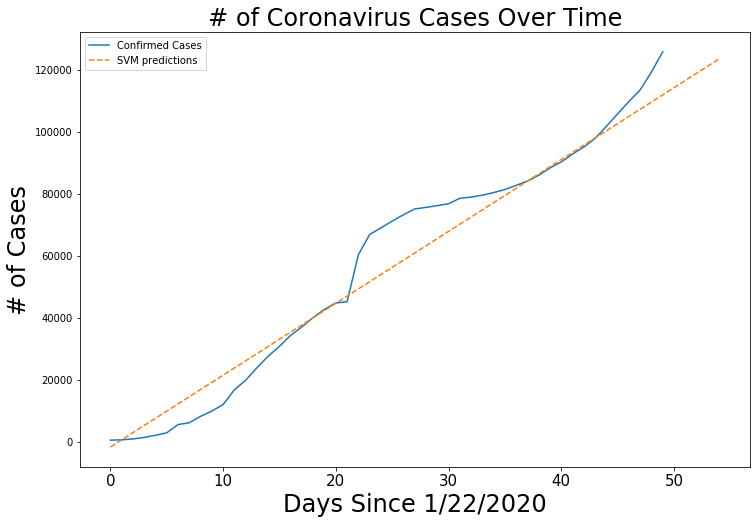

In [163]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed')
plt.title('# of Coronavirus Cases Over Time', size=24)
plt.xlabel('Days Since 1/22/2020', size=24)
plt.ylabel('# of Cases', size=24)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [164]:
# Future predictions using SVM 
print('SVM future predictions:')
print("Date             # Cases")
print("------------------------")
for i in range(len(future_forcast_dates[-5:])):
    print("%s        %d"%(future_forcast_dates[-5+i], svm_pred[-5+i]))

SVM future predictions:
Date             # Cases
------------------------
03/12/2020        114262
03/13/2020        116581
03/14/2020        118899
03/15/2020        121218
03/16/2020        123536


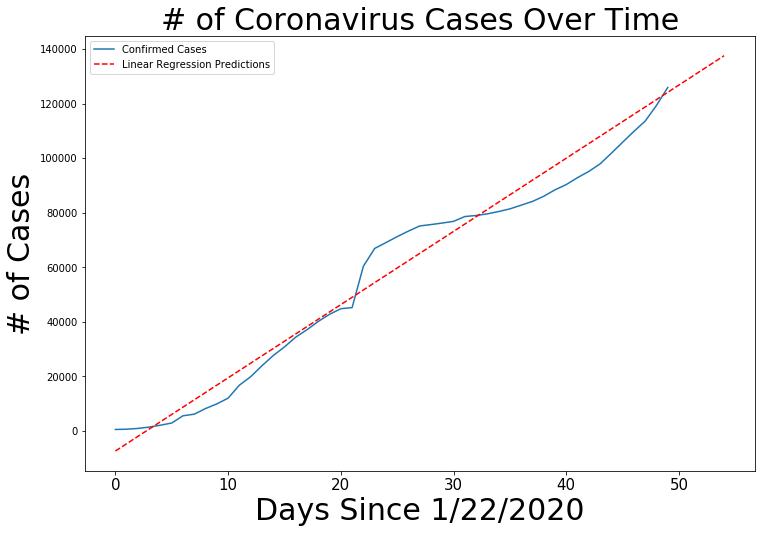

In [165]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='red')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [166]:
# Future predictions using Linear Regression 
print('Linear regression future predictions:')
print("Date             # Cases")
print("------------------------")
for i in range(len(future_forcast_dates[-5:])):
    print("%s        %d"%(future_forcast_dates[-5+i], linear_pred[-5+i]))

Linear regression future predictions:
Date             # Cases
------------------------
03/12/2020        126790
03/13/2020        129473
03/14/2020        132156
03/15/2020        134838
03/16/2020        137521


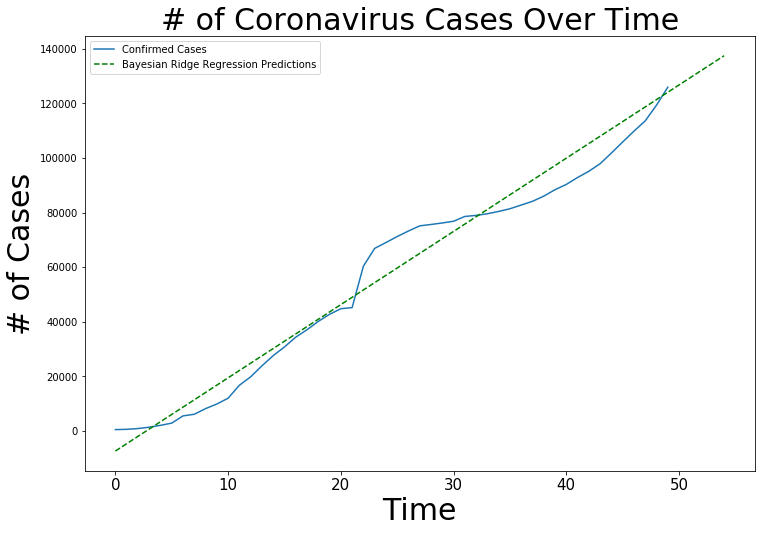

In [167]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Bayesian Ridge Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [168]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
print("Date             # Cases")
print("------------------------")
for i in range(len(future_forcast_dates[-5:])):
    print("%s        %d"%(future_forcast_dates[-5+i], bayesian_pred[-5+i]))

Ridge regression future predictions:
Date             # Cases
------------------------
03/12/2020        126707
03/13/2020        129387
03/14/2020        132067
03/15/2020        134747
03/16/2020        137427


## Graphing the number of deaths, mortality rate over time and number of recoveries.

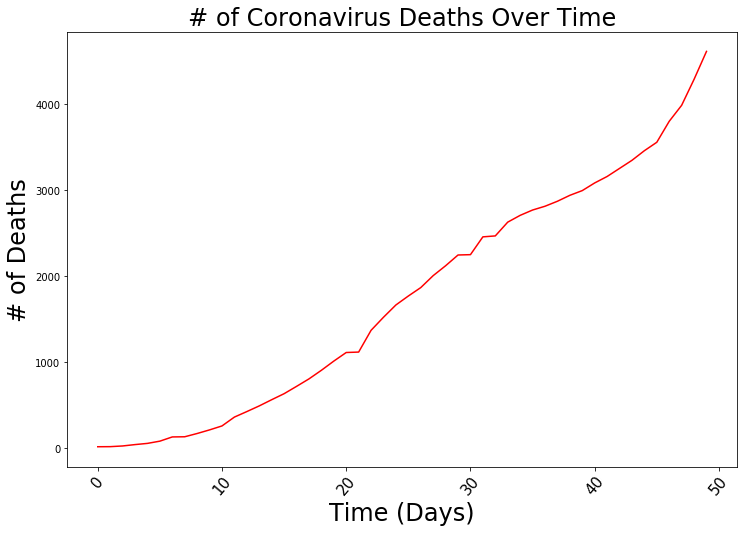

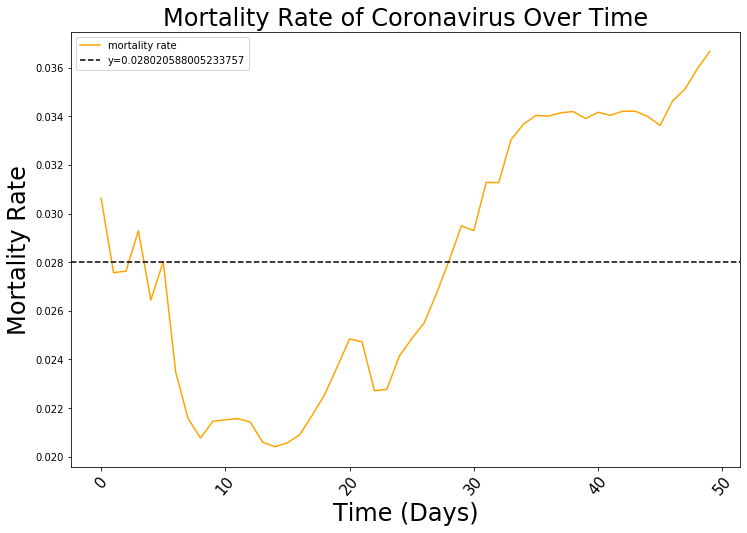

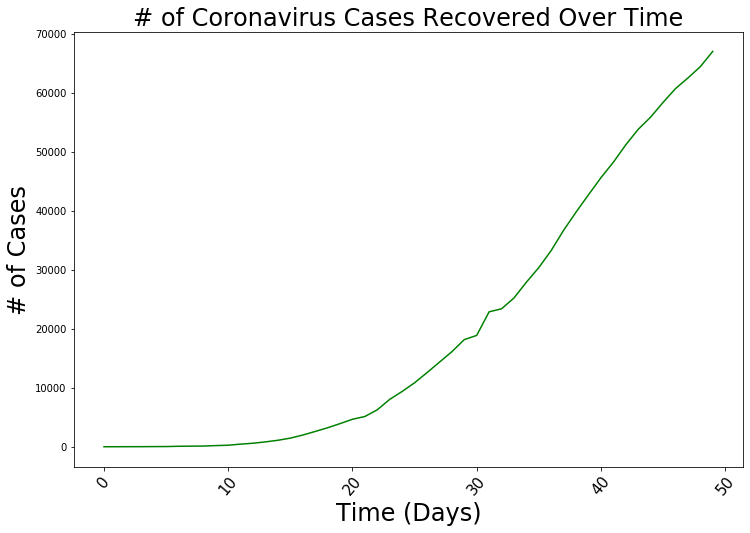

In [169]:
#####
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=24)
plt.xlabel('Time (Days)', size=24)
plt.ylabel('# of Deaths', size=24)
plt.xticks(rotation=50, size=15)
plt.show()
#####
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=24)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time (Days)', size=24)
plt.ylabel('Mortality Rate', size=24)
plt.xticks(rotation=50, size=15)
plt.show()
######
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('# of Coronavirus Cases Recovered Over Time', size=24)
plt.xlabel('Time (Days)', size=24)
plt.ylabel('# of Cases', size=24)
plt.xticks(rotation=50, size=15)
plt.show()

## Graphing the number of deaths and the number of recoveries together.

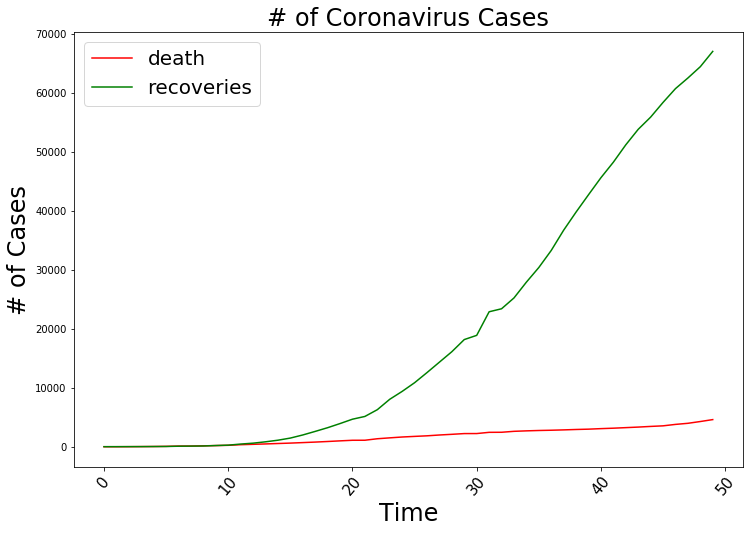

In [170]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=24)
plt.xlabel('Time', size=24)
plt.ylabel('# of Cases', size=24)
plt.xticks(rotation=50, size=15)
plt.show()

## Plotting the number of deaths against the number of recoveries

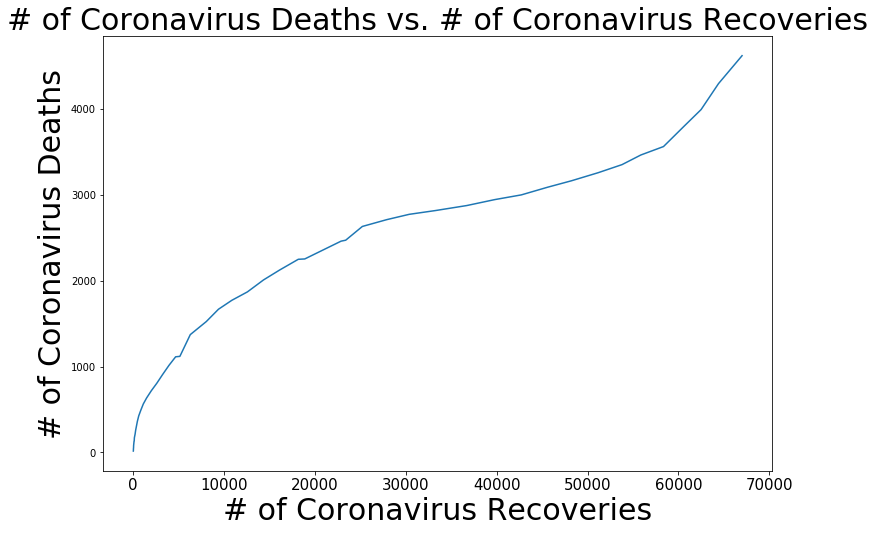

In [171]:
plt.figure(figsize=(12, 8))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

## Getting information about countries/regions that have confirmed coronavirus cases

In [172]:
latest_confirmed = confirmed_data[dates[-1]]
latest_deaths = deaths_data[dates[-1]]
latest_recoveries = recoveries_data[dates[-1]]
country_confirmed_cases = []

unique_countries =  list(confirmed_data['Country/Region'].unique())

In [173]:
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_data['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)

## Visual Representations

In [174]:
# number of cases per country/region
unique_countries = {unique_countries[i]:country_confirmed_cases[i] for i in range(len(unique_countries))}
unique_countries = {i:unique_countries[i] for i in sorted(unique_countries, key = unique_countries.get, reverse = True)}

<BarContainer object of 114 artists>

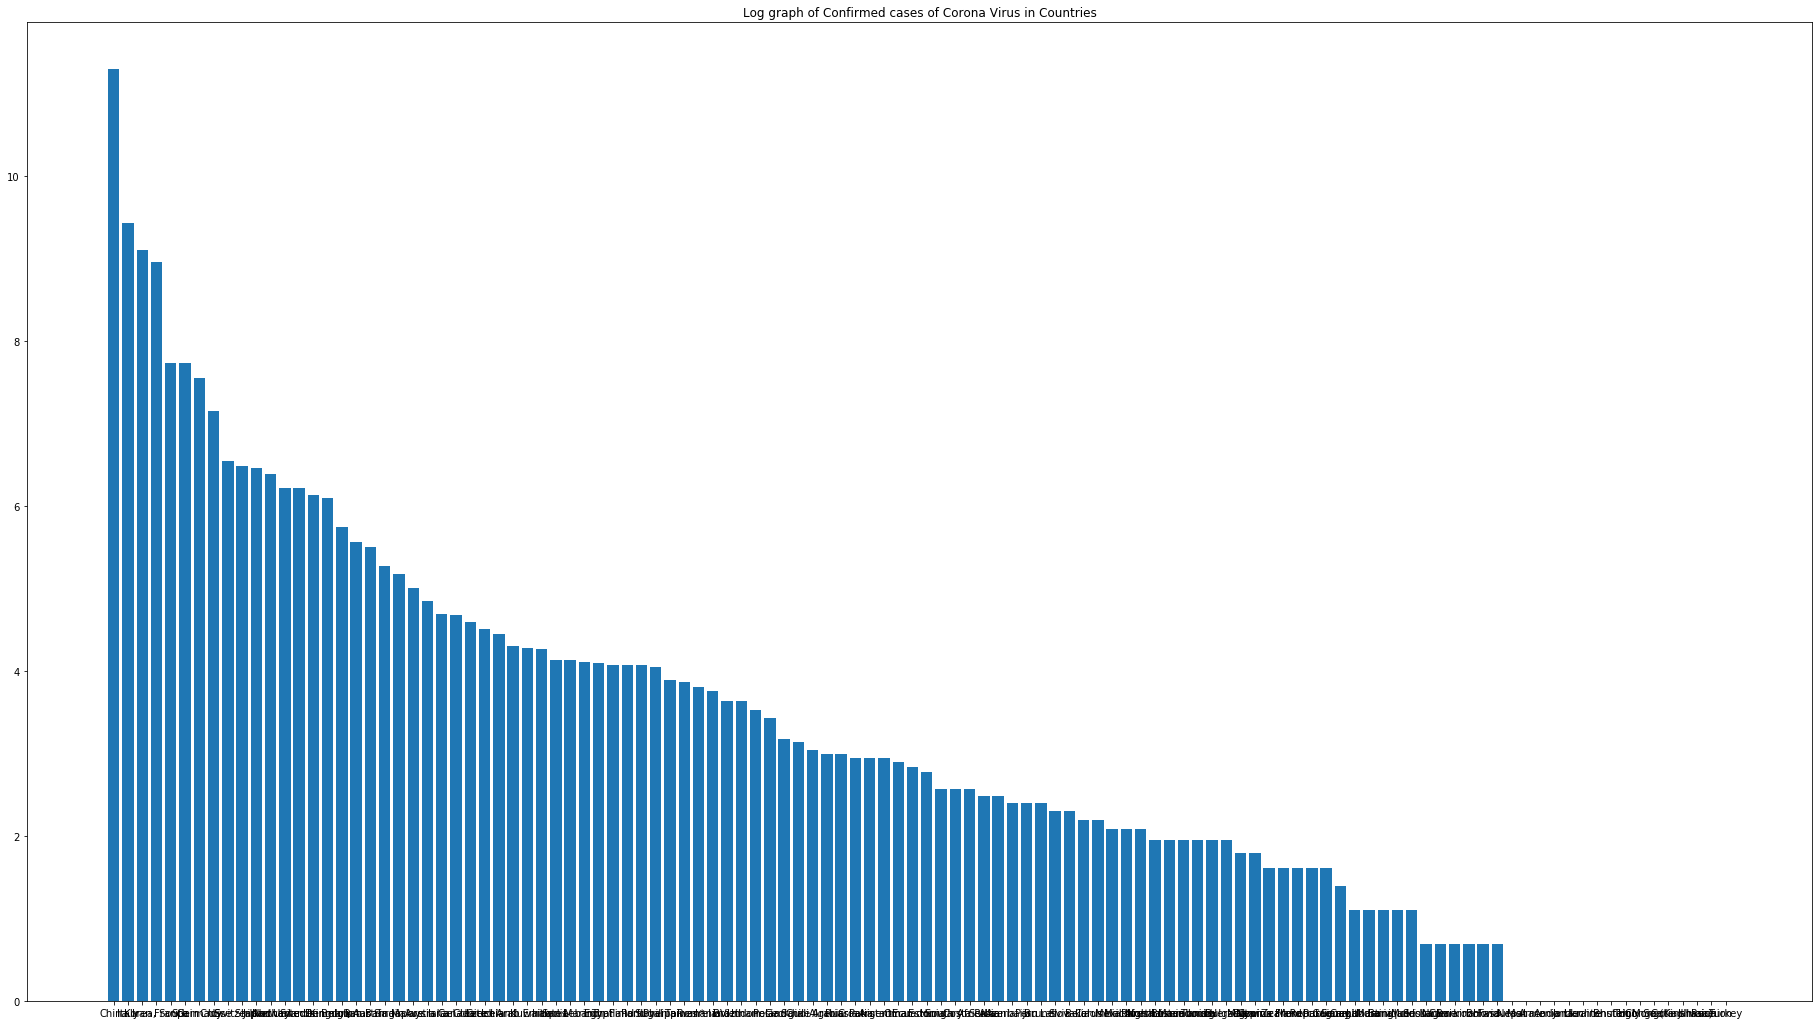

In [175]:
plt.figure(figsize=(32, 18))
plt.title("Log graph of Confirmed cases of Corona Virus in Countries")
plt.bar(unique_countries.keys(), np.log(list(unique_countries.values())))

In [176]:
unique_provinces =  list(confirmed_data['Province/State'].unique())

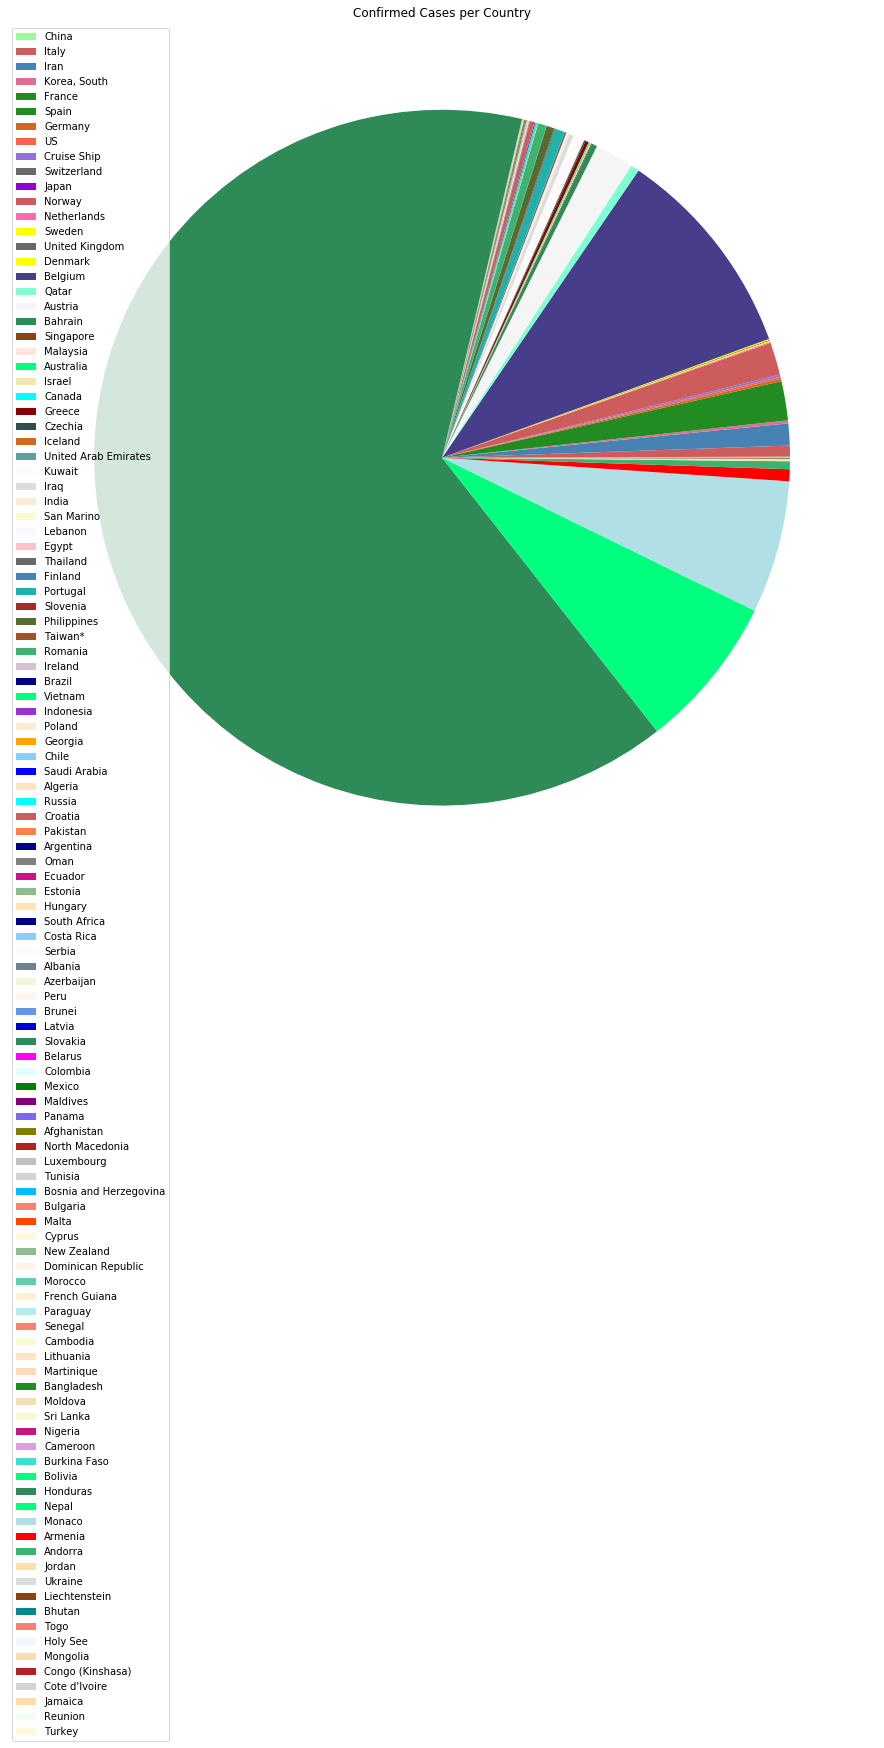

In [177]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),
                   k = len(unique_countries))
plt.figure(figsize=(16, 16))
plt.title('Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

## Confirmed Cases India

In [178]:
india_data = confirmed_data[confirmed_data['Country/Region'] == 'India']

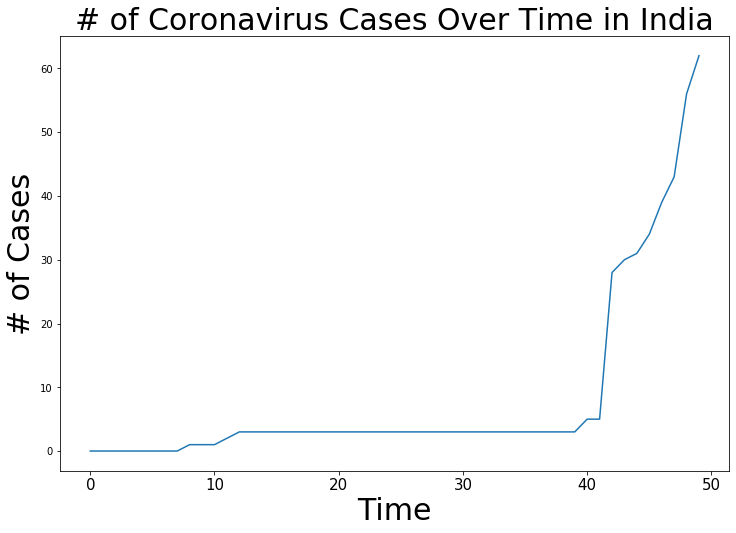

In [179]:
plt.figure(figsize=(12, 8))
plt.plot(adjusted_dates, india_data.values[:, 4:].reshape((-1, 1)))
plt.title('# of Coronavirus Cases Over Time in India', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()